In [119]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility

In [120]:
# network and training
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [121]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [122]:
X_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [123]:
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [124]:
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [125]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [126]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [127]:
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_41 (Activation)   (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [128]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [129]:
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 17us/step - loss: 1.4260 - accuracy: 0.6437 - val_loss: 0.9047 - val_accuracy: 0.8271
Epoch 2/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.8004 - accuracy: 0.8292 - val_loss: 0.6598 - val_accuracy: 0.8597
Epoch 3/200
48000/48000 [==============================] - 1s 12us/step - loss: 0.6458 - accuracy: 0.8502 - val_loss: 0.5627 - val_accuracy: 0.8712
Epoch 4/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.5721 - accuracy: 0.8615 - val_loss: 0.5094 - val_accuracy: 0.8798
Epoch 5/200
48000/48000 [==============================] - 1s 14us/step - loss: 0.5274 - accuracy: 0.8684 - val_loss: 0.4751 - val_accuracy: 0.8842
Epoch 6/200
48000/48000 [==============================] - 1s 14us/step - loss: 0.4969 - accuracy: 0.8745 - val_loss: 0.4508 - val_accuracy: 0.8879
Epoch 7/200
48000/48000 [==============================] - 1s 

Epoch 56/200
48000/48000 [==============================] - 1s 14us/step - loss: 0.3170 - accuracy: 0.9114 - val_loss: 0.3039 - val_accuracy: 0.9159
Epoch 57/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.3162 - accuracy: 0.9119 - val_loss: 0.3035 - val_accuracy: 0.9154
Epoch 58/200
48000/48000 [==============================] - 1s 12us/step - loss: 0.3155 - accuracy: 0.9121 - val_loss: 0.3030 - val_accuracy: 0.9160
Epoch 59/200
48000/48000 [==============================] - 1s 12us/step - loss: 0.3148 - accuracy: 0.9121 - val_loss: 0.3024 - val_accuracy: 0.9162
Epoch 60/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.3141 - accuracy: 0.9125 - val_loss: 0.3018 - val_accuracy: 0.9170
Epoch 61/200
48000/48000 [==============================] - 1s 14us/step - loss: 0.3135 - accuracy: 0.9127 - val_loss: 0.3013 - val_accuracy: 0.9172
Epoch 62/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.3128 - accuracy: 0.9129

Epoch 111/200
48000/48000 [==============================] - 1s 14us/step - loss: 0.2924 - accuracy: 0.9185 - val_loss: 0.2859 - val_accuracy: 0.9209
Epoch 112/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2922 - accuracy: 0.9186 - val_loss: 0.2858 - val_accuracy: 0.9207
Epoch 113/200
48000/48000 [==============================] - 1s 14us/step - loss: 0.2919 - accuracy: 0.9189 - val_loss: 0.2855 - val_accuracy: 0.9212
Epoch 114/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2916 - accuracy: 0.9186 - val_loss: 0.2854 - val_accuracy: 0.9210
Epoch 115/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2913 - accuracy: 0.9189 - val_loss: 0.2853 - val_accuracy: 0.9208
Epoch 116/200
48000/48000 [==============================] - 1s 14us/step - loss: 0.2911 - accuracy: 0.9186 - val_loss: 0.2849 - val_accuracy: 0.9214
Epoch 117/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2908 - accuracy:

In [130]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])
print()
print(score)

10000/10000 [==============================] - 0s 18us/step
Test score: 0.2777468033015728
Test accuracy: 0.9225999712944031

[0.2777468033015728, 0.9225999712944031]


### Training a new model by adding two more layers and running for the same number of epochs. You might notice that after around 75 epochs, the accuracy was almost same, hence the model can't improve any further.

In [131]:
NB_EPOCH = 20

In [132]:
new_model = Sequential()
new_model.add(Dense(N_HIDDEN, input_shape=(RESHAPED, )))
new_model.add(Activation('relu'))
new_model.add(Dense(N_HIDDEN))
new_model.add(Activation('relu'))
new_model.add(Dense(NB_CLASSES))
new_model.add(Activation('softmax'))
new_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_42 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_43 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_44 (Activation)   (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_______________________________________________

In [133]:
new_model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [134]:
new_history = new_model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - ETA: 0s - loss: 1.4463 - accuracy: 0.60 - 1s 19us/step - loss: 1.4425 - accuracy: 0.6106 - val_loss: 0.7295 - val_accuracy: 0.8413
Epoch 2/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.5862 - accuracy: 0.8558 - val_loss: 0.4505 - val_accuracy: 0.8859
Epoch 3/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.4314 - accuracy: 0.8849 - val_loss: 0.3703 - val_accuracy: 0.8982
Epoch 4/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.3727 - accuracy: 0.8967 - val_loss: 0.3332 - val_accuracy: 0.9072
Epoch 5/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.3398 - accuracy: 0.9047 - val_loss: 0.3096 - val_accuracy: 0.9124
Epoch 6/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.3168 - accuracy: 0.9100 - val_loss: 0.2914 - val_accuracy: 0.9175
Epoch 7/20
48000/48000 [==

In [135]:
new_score = new_model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", new_score[0])
print('Test accuracy:', new_score[1])

10000/10000 [==============================] - 0s 21us/step
Test score: 0.1886545365214348
Test accuracy: 0.9449999928474426


### Training the same model with the inclusion of dropout

In [136]:
from keras.layers.core import Dropout

In [137]:
DROPOUT = 0.3

In [138]:
model_with_dropout = Sequential()
model_with_dropout.add(Dense(N_HIDDEN, input_shape=(RESHAPED, )))
model_with_dropout.add(Activation('relu'))
model_with_dropout.add(Dropout(DROPOUT))
model_with_dropout.add(Dense(N_HIDDEN))
model_with_dropout.add(Activation('relu'))
model_with_dropout.add(Dropout(DROPOUT))
model_with_dropout.add(Dense(NB_CLASSES))
model_with_dropout.add(Activation('softmax'))
model_with_dropout.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_45 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_46 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)              

In [139]:
model_with_dropout.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [140]:
model_with_dropout_history=model_with_dropout.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 26us/step - loss: 1.6924 - accuracy: 0.4584 - val_loss: 0.9054 - val_accuracy: 0.8043
Epoch 2/20
48000/48000 [==============================] - 1s 28us/step - loss: 0.9097 - accuracy: 0.7173 - val_loss: 0.5271 - val_accuracy: 0.8688
Epoch 3/20
48000/48000 [==============================] - 1s 26us/step - loss: 0.6815 - accuracy: 0.7909 - val_loss: 0.4187 - val_accuracy: 0.8891
Epoch 4/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.5810 - accuracy: 0.8231 - val_loss: 0.3654 - val_accuracy: 0.9005
Epoch 5/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.5212 - accuracy: 0.8453 - val_loss: 0.3326 - val_accuracy: 0.9072
Epoch 6/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.4783 - accuracy: 0.8582 - val_loss: 0.3114 - val_accuracy: 0.9105
Epoch 7/20
48000/48000 [==============================] - 1s 22us/st

In [141]:
dropout_score=model_with_dropout.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", dropout_score[0])
print('Test accuracy:', dropout_score[1])

10000/10000 [==============================] - 0s 18us/step
Test score: 0.1901324488207698
Test accuracy: 0.9430999755859375


### Note that the training accuracy should still be above the test accuracy, otherwise we are not training long enough. 

In [142]:
NB_EPOCH = 250

In [143]:
dropout_history = model_with_dropout.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
dropout_score = model_with_dropout.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", dropout_score[0])
print('Test accuracy:', dropout_score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.2793 - accuracy: 0.9175 - val_loss: 0.1880 - val_accuracy: 0.9459
Epoch 2/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.2731 - accuracy: 0.9199 - val_loss: 0.1839 - val_accuracy: 0.9468
Epoch 3/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.2687 - accuracy: 0.9206 - val_loss: 0.1805 - val_accuracy: 0.9476
Epoch 4/250
48000/48000 [==============================] - 1s 27us/step - loss: 0.2634 - accuracy: 0.9229 - val_loss: 0.1763 - val_accuracy: 0.9493
Epoch 5/250
48000/48000 [==============================] - 2s 32us/step - loss: 0.2596 - accuracy: 0.9225 - val_loss: 0.1736 - val_accuracy: 0.9496
Epoch 6/250
48000/48000 [==============================] - 2s 35us/step - loss: 0.2517 - accuracy: 0.9270 - val_loss: 0.1700 - val_accuracy: 0.9505
Epoch 7/250
48000/48000 [==============================] - 2s 

Epoch 56/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.1405 - accuracy: 0.9578 - val_loss: 0.1046 - val_accuracy: 0.9682
Epoch 57/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.1384 - accuracy: 0.9594 - val_loss: 0.1044 - val_accuracy: 0.9678
Epoch 58/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.1407 - accuracy: 0.9575 - val_loss: 0.1041 - val_accuracy: 0.9681
Epoch 59/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.1363 - accuracy: 0.9600 - val_loss: 0.1032 - val_accuracy: 0.9687
Epoch 60/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.1352 - accuracy: 0.9594 - val_loss: 0.1034 - val_accuracy: 0.9685
Epoch 61/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.1361 - accuracy: 0.9600 - val_loss: 0.1023 - val_accuracy: 0.9689
Epoch 62/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.1329 - accuracy: 0.9607

Epoch 111/250
48000/48000 [==============================] - 1s 25us/step - loss: 0.1000 - accuracy: 0.9696 - val_loss: 0.0873 - val_accuracy: 0.9743
Epoch 112/250
48000/48000 [==============================] - 1s 24us/step - loss: 0.1000 - accuracy: 0.9697 - val_loss: 0.0867 - val_accuracy: 0.9736
Epoch 113/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.0992 - accuracy: 0.9701 - val_loss: 0.0866 - val_accuracy: 0.9735
Epoch 114/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.0984 - accuracy: 0.9707 - val_loss: 0.0868 - val_accuracy: 0.9742
Epoch 115/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.0964 - accuracy: 0.9711 - val_loss: 0.0864 - val_accuracy: 0.9736
Epoch 116/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.0999 - accuracy: 0.9704 - val_loss: 0.0858 - val_accuracy: 0.9745
Epoch 117/250
48000/48000 [==============================] - 1s 23us/step - loss: 0.0970 - accuracy:

Epoch 220/250
48000/48000 [==============================] - 1s 26us/step - loss: 0.0643 - accuracy: 0.9797 - val_loss: 0.0772 - val_accuracy: 0.9781
Epoch 221/250
48000/48000 [==============================] - 1s 25us/step - loss: 0.0624 - accuracy: 0.9809 - val_loss: 0.0780 - val_accuracy: 0.9777
Epoch 222/250
48000/48000 [==============================] - 1s 25us/step - loss: 0.0636 - accuracy: 0.9800 - val_loss: 0.0776 - val_accuracy: 0.9779
Epoch 223/250
48000/48000 [==============================] - 1s 25us/step - loss: 0.0622 - accuracy: 0.9808 - val_loss: 0.0776 - val_accuracy: 0.9778
Epoch 224/250
48000/48000 [==============================] - 1s 25us/step - loss: 0.0620 - accuracy: 0.9807 - val_loss: 0.0781 - val_accuracy: 0.9772
Epoch 225/250
48000/48000 [==============================] - 1s 25us/step - loss: 0.0604 - accuracy: 0.9808 - val_loss: 0.0780 - val_accuracy: 0.9771
Epoch 226/250
48000/48000 [==============================] - 1s 25us/step - loss: 0.0622 - accuracy:

### Till now we have used SGD as the optimisation function. Now we'll try RMSprop and Adam

In [144]:
from keras.optimizers import RMSprop, Adam

In [145]:
OPTIMIZER = RMSprop()

In [146]:
NB_EPOCH = 20

In [147]:
dropout_history = model_with_dropout.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
dropout_score = model_with_dropout.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", dropout_score[0])
print('Test accuracy:', dropout_score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 27us/step - loss: 0.0583 - accuracy: 0.9814 - val_loss: 0.0767 - val_accuracy: 0.9783
Epoch 2/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.0773 - val_accuracy: 0.9782
Epoch 3/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.0586 - accuracy: 0.9814 - val_loss: 0.0770 - val_accuracy: 0.9783
Epoch 4/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.0581 - accuracy: 0.9813 - val_loss: 0.0771 - val_accuracy: 0.9783
Epoch 5/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.0573 - accuracy: 0.9817 - val_loss: 0.0769 - val_accuracy: 0.9781
Epoch 6/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.0556 - accuracy: 0.9828 - val_loss: 0.0772 - val_accuracy: 0.9781
Epoch 7/20
48000/48000 [==============================] - 1s 25us/st

In [148]:
OPTIMIZER = Adam()

In [149]:
dropout_history = model_with_dropout.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
dropout_score = model_with_dropout.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", dropout_score[0])
print('Test accuracy:', dropout_score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.0569 - accuracy: 0.9820 - val_loss: 0.0765 - val_accuracy: 0.9785
Epoch 2/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0768 - val_accuracy: 0.9787
Epoch 3/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.0538 - accuracy: 0.9829 - val_loss: 0.0769 - val_accuracy: 0.9783
Epoch 4/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.0536 - accuracy: 0.9827 - val_loss: 0.0770 - val_accuracy: 0.9781
Epoch 5/20
48000/48000 [==============================] - 1s 27us/step - loss: 0.0553 - accuracy: 0.9826 - val_loss: 0.0765 - val_accuracy: 0.9787
Epoch 6/20
48000/48000 [==============================] - 1s 25us/step - loss: 0.0533 - accuracy: 0.9830 - val_loss: 0.0766 - val_accuracy: 0.9786
Epoch 7/20
48000/48000 [==============================] - 1s 25us/st

### Inclusion of regularisation [L1/Lasso (sum of the absolute values of the weights), L2/Ridge (sum of the squares of the weights) and elastic net regularization (combination of L1 and L2)] in our model.

In [150]:
from keras import regularizers

In [151]:
# using L1

model_with_dropout = Sequential()
model_with_dropout.add(Dense(N_HIDDEN, input_shape=(RESHAPED, )))
model_with_dropout.add(Activation('relu'))
model_with_dropout.add(Dropout(DROPOUT))
model_with_dropout.add(Dense(N_HIDDEN))
model_with_dropout.add(Activation('relu'))
model_with_dropout.add(Dense((N_HIDDEN), kernel_regularizer=regularizers.l1(0.01))) # using L1
model_with_dropout.add(Activation('relu'))
model_with_dropout.add(Dropout(DROPOUT))
model_with_dropout.add(Dense(NB_CLASSES))
model_with_dropout.add(Activation('softmax'))
model_with_dropout.summary()

model_with_dropout.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

model_with_dropout_history=model_with_dropout.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

dropout_score=model_with_dropout.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", dropout_score[0])
print('Test accuracy:', dropout_score[1])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_48 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_49 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_50 (Activation)   (None, 128)             

In [152]:
# using L2

model_with_dropout = Sequential()
model_with_dropout.add(Dense(N_HIDDEN, input_shape=(RESHAPED, )))
model_with_dropout.add(Activation('relu'))
model_with_dropout.add(Dropout(DROPOUT))
model_with_dropout.add(Dense(N_HIDDEN))
model_with_dropout.add(Activation('relu'))
model_with_dropout.add(Dense((N_HIDDEN), kernel_regularizer=regularizers.l2(0.01))) # using L2
model_with_dropout.add(Activation('relu'))
model_with_dropout.add(Dropout(DROPOUT))
model_with_dropout.add(Dense(NB_CLASSES))
model_with_dropout.add(Activation('softmax'))
model_with_dropout.summary()

model_with_dropout.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

model_with_dropout_history=model_with_dropout.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

dropout_score=model_with_dropout.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", dropout_score[0])
print('Test accuracy:', dropout_score[1])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_52 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_53 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_54 (Activation)   (None, 128)             

The predicted digit is:  1
The original image is: 


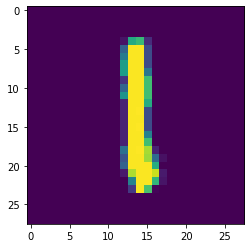

In [185]:
# Check how our neural network in working by diplaying the prediction and the real target.
test_exp_no = 168
print("The predicted digit is: ", model_with_dropout.predict_classes(X_test)[test_exp_no])
print("The original image is: ")
img1 = X_test[test_exp_no].reshape(28, 28)
from matplotlib import pyplot as plt
plt.imshow(img1, interpolation='nearest')
plt.show()